In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gc
from matplotlib import pyplot as plt

In [2]:
rootdir = Path().resolve().parent
cachedir = rootdir / "data" / "cache" / "df"

In [3]:
import sys
sys.path.append(str(rootdir))
import src.utils.data as data
import src.markets.lagfeaturesharpratio as markets

In [4]:
NUM_DIVIDE = 5
MINUTES = "1min"
NUM_TAIN_ENV_STEPS = 288
N_LAG = 15

In [5]:
df, features = data.load_bybit_data(
    num_divide=NUM_DIVIDE,
    interval=MINUTES,
    use_cache=False,
    ta_config_file="config_mine.json"
)

ROC ・・・
     - roc 1  Done
     - roc_diff 1  Done
     - roc_range 1  Done
     - roc_mean 1  Done
     - roc_mean_diff 1  Done
     - roc 2  Done
     - roc_diff 2  Done
     - roc_range 2  Done
     - roc_mean 2  Done
     - roc_mean_diff 2  Done
     - roc 3  Done
     - roc_diff 3  Done
     - roc_range 3  Done
     - roc_mean 3  Done
     - roc_mean_diff 3  Done
     - roc 4  Done
     - roc_diff 4  Done
     - roc_range 4  Done
     - roc_mean 4  Done
     - roc_mean_diff 4  Done
     - roc 5  Done
     - roc_diff 5  Done
     - roc_range 5  Done
     - roc_mean 5  Done
     - roc_mean_diff 5  Done
     - roc 6  Done
     - roc_diff 6  Done
     - roc_range 6  Done
     - roc_mean 6  Done
     - roc_mean_diff 6  Done
     - roc 7  Done
     - roc_diff 7  Done
     - roc_range 7  Done
     - roc_mean 7  Done
     - roc_mean_diff 7  Done
     - roc 8  Done
     - roc_diff 8  Done
     - roc_range 8  Done
     - roc_mean 8  Done
     - roc_mean_diff 8  Done
     - roc 9  Done
     

In [6]:
df1 = df.loc[df["fold"] == (0)].reset_index(drop=True)
df2 = df.loc[df["fold"] == (4)].reset_index(drop=True)

df1["label"], df2["label"] = 0, 1
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

del df1, df2
gc.collect()

0

In [7]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score


def train_lgb(df, cols: list[str]):
    train_ds = lgb.Dataset(df[cols], label=df["label"])
    
    model = lgb.train(
        params, 
        train_ds, 
        valid_sets=[train_ds], 
        feval=feval_acc,
        callbacks=[
            lgb.log_evaluation(100)
        ]
    )
    train_score = accuracy_score(
        df["label"].values, 
        (model.predict(df[cols].values) > 0.5).astype(int)
    )
    return model, train_score
    
    
def feval_acc(preds, data):
    y_true = data.get_label()
    y_pred = (preds > 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    return "accuracy", acc, True

params = {
    "objective": "binary",
    "verbosity": -1
}

In [ ]:
dfimp = []
for f in df.columns[8:-2]:
    model, score = train_lgb(df, cols=[f])
    dfimp.append([f, score])
dfimp = pd.DataFrame(dfimp, columns=["name", "score"])
dfimp

[100]	training's binary_logloss: 0.641692	training's accuracy: 0.627634
[100]	training's binary_logloss: 0.641916	training's accuracy: 0.6273
[100]	training's binary_logloss: 0.469506	training's accuracy: 0.768969
[100]	training's binary_logloss: 0.642612	training's accuracy: 0.628245
[100]	training's binary_logloss: 0.642566	training's accuracy: 0.627731
[100]	training's binary_logloss: 0.643337	training's accuracy: 0.627703
[100]	training's binary_logloss: 0.64374	training's accuracy: 0.626759
[100]	training's binary_logloss: 0.475046	training's accuracy: 0.766927
[100]	training's binary_logloss: 0.644658	training's accuracy: 0.626856
[100]	training's binary_logloss: 0.645039	training's accuracy: 0.626773
[100]	training's binary_logloss: 0.64538	training's accuracy: 0.62437
[100]	training's binary_logloss: 0.645853	training's accuracy: 0.624925
[100]	training's binary_logloss: 0.483907	training's accuracy: 0.761774
[100]	training's binary_logloss: 0.646804	training's accuracy: 0.6230

,name,score
0,ROC_roc_1,0.627634
1,ROC_roc_diff_1,0.627300
2,ROC_roc_range_1,0.768969
3,ROC_roc_mean_1,0.628245
4,ROC_roc_mean_diff_1,0.627731
5,ROC_roc_2,0.627703
6,ROC_roc_diff_2,0.626759
7,ROC_roc_range_2,0.766927
8,ROC_roc_mean_2,0.626856
9,ROC_roc_mean_diff_2,0.626773


In [11]:
features1 = dfimp.loc[dfimp["score"] <= 0.7, "name"].values
model, score = train_lgb(df, cols=features1)

[100]	training's binary_logloss: 0.500568	training's accuracy: 0.754399


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

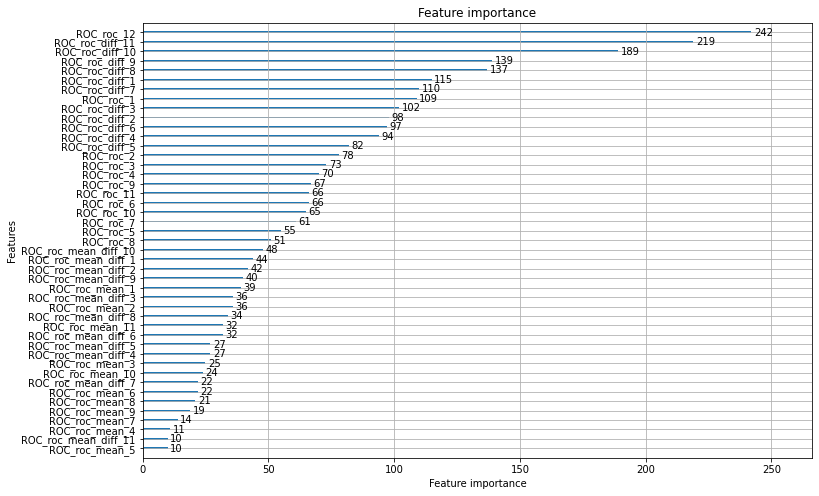

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
lgb.plot_importance(model, ax=ax)

In [13]:
dfimp = pd.DataFrame({"name": model.feature_name(), "value": model.feature_importance()})
dfimp.sort_values("value")

,name,value
47,ROC_roc_mean_diff_12,0
45,ROC_roc_diff_12,0
46,ROC_roc_mean_12,0
43,ROC_roc_mean_diff_11,10
18,ROC_roc_mean_5,10
14,ROC_roc_mean_4,11
26,ROC_roc_mean_7,14
34,ROC_roc_mean_9,19
30,ROC_roc_mean_8,21
27,ROC_roc_mean_diff_7,22
